Use a pretrained network to extract features
    + Load the pretrained model.
    + Create numpy arrays and fill them by running data through  pretrained model.
    + 

In [49]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

### Load pretrained model

In [1]:
from keras.applications import VGG16

In [4]:
conv_base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150,150,3))

In [5]:
conv_base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

### SetUp Data sources

In [19]:
import os
import numpy as np

In [20]:
pwd_ = os.getcwd()
pwd_

'D:\\Github\\DeepNets\\Keras\\Keras_from_scratch\\Vision'

In [21]:
path =  os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(os.path.dirname(pwd_)))))
print(path)

D:\


In [22]:
dest_data_folder = os.path.join(os.path.join(path, "Warehouse"), "cats_and_dogs")

train_dir = os.path.join(dest_data_folder, "train")
cat_train_dir = os.path.join(train_dir, "cat")
dog_train_dir = os.path.join(train_dir, "dog")


test_dir = os.path.join(dest_data_folder, "test")
cat_test_dir = os.path.join(test_dir, "cat")
dog_test_dir = os.path.join(test_dir, "dog")


validation_dir = os.path.join(dest_data_folder, "validation")
cat_validation_dir = os.path.join(validation_dir, "cat")
dog_validation_dir = os.path.join(validation_dir, "dog")


### Extracting features using the pretrained convolutional base

In [17]:
from keras.preprocessing.image import ImageDataGenerator

In [18]:
train_DataGen = ImageDataGenerator(rescale=1.0/255)

tDG = train_DataGen.flow_from_directory(
        train_dir,
        target_size = (150, 150),
        batch_size = 20,
        class_mode = 'binary')

Found 4000 images belonging to 2 classes.


In [40]:
batch_size_ = 20

def extract_features(data_dir, no_of_data_points):
    
    features = np.zeros(shape=(no_of_data_points, 4, 4, 512))
    labels = np.zeros(shape=(no_of_data_points,))

    DataGen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
    
    DG = DataGen.flow_from_directory(
                        data_dir, 
                        target_size = (150, 150), 
                        batch_size = batch_size_, 
                        class_mode='binary')
    
    i = 0 
    
    for (batch_data, batch_label) in DG:
        
        base_features = conv_base_model.predict(batch_data)
        
        features[i*batch_size_ : (i+1)*batch_size_] = base_features
        labels[i*batch_size_ : (i+1)*batch_size_] = batch_label
        
        i = i+1
        
        if (i%1000 == 0):
            print (i*batch_size_)
        
        if (i*batch_size_) >= no_of_data_points:
            break;
            
    return (features, labels)
        
        
        
    

In [43]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 4000 images belonging to 2 classes.
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060
1080
1100
1120
1140
1160
1180
1200
1220
1240
1260
1280
1300
1320
1340
1360
1380
1400
1420
1440
1460
1480
1500
1520
1540
1560
1580
1600
1620
1640
1660
1680
1700
1720
1740
1760
1780
1800
1820
1840
1860
1880
1900
1920
1940
1960
1980
2000
Found 2000 images belonging to 2 classes.
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
Found 2000 images belonging to 2 classes.
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000


In [44]:
print(train_features.shape)
print(train_labels.shape)

print(validation_features.shape)
print(validation_labels.shape)

print(test_features.shape)
print(test_labels.shape)


(2000, 4, 4, 512)
(2000,)
(1000, 4, 4, 512)
(1000,)
(1000, 4, 4, 512)
(1000,)


In [45]:
# flatten the feature sets

train_features = np.reshape(train_features, (2000, -1))
validation_features = np.reshape(validation_features, (1000, -1))
test_features = np.reshape(test_features, (1000, -1))

In [46]:
print(train_features.shape)

print(validation_features.shape)

print(test_features.shape)

(2000, 8192)
(1000, 8192)
(1000, 8192)


### Simple feed forward

In [47]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()

model.add(layers.Dense(256, activation='relu', input_shape=(4 * 4 * 512,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
loss='binary_crossentropy',
metrics=['acc'])


history = model.fit(train_features, train_labels,
epochs=30,
batch_size=20,
validation_data=(validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.5898 - acc: 0.6740 - val_loss: 0.4298 - val_acc: 0.8430
Epoch 2/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.4308 - acc: 0.8115 - val_loss: 0.3547 - val_acc: 0.8530
Epoch 3/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3714 - acc: 0.8350 - val_loss: 0.3253 - val_acc: 0.8590
Epoch 4/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.3312 - acc: 0.8670 - val_loss: 0.2971 - val_acc: 0.8710
Epoch 5/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2939 - acc: 0.8825 - val_loss: 0.2839 - val_acc: 0.8800
Epoch 6/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2714 - acc: 0.8975 - val_loss: 0.2745 - val_acc: 0.87701s
Epoch 7/30
2000/2000 [==============================] - 4s 2ms/step - loss: 0.2569 - acc: 0.8985 - val_loss: 0.2629 - val_acc: 0.8830
Epoch 8/30
2

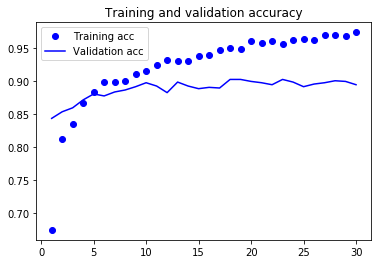

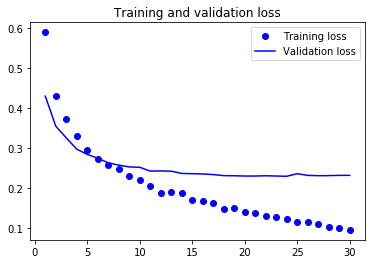

In [50]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
    
plt.show()